In [36]:
from ecephys.plot.plot import _lfp_explorer
import ecephys_analyses as ea
from sglxarray import load_trigger
from ecephys.signal.utils import mean_subtract, median_subtract
import matplotlib.pyplot as plt

In [329]:
import numpy as np

def glb_dmx(sig, sort_by_channel_label=False):
    n_chans = 384 #Number of total channels
    n_adcs = 24 # Number of ADCs
    n_chans_per_adc = n_chans / n_adcs
    adcs = np.tile(np.arange(n_chans_per_adc), n_adcs)
    _sig = sig.sortby('channel') if sort_by_channel_label else sig.copy()
    _sig = _sig.assign_coords(adc=('channel', adcs))
    adc_avgs = _sig.groupby('adc').mean()
    _sig = _sig - np.tile(adc_avgs, n_adcs)
    return _sig.reindex_like(sig) if sort_by_channel_label else _sig


In [430]:
SUBJECT = "Charles"
EXPERIMENT = "sleep_homeostasis"
ALIAS = "recovery_sleep"
PROBE = "imec1"
START_TIME = 1185 # LFP-NREM = 1185, REM = 616

In [431]:
chans = ea.get_channels(SUBJECT, EXPERIMENT, PROBE, "all")

In [432]:
bin_path = ea.get_raw_files(SUBJECT, EXPERIMENT, ALIAS, probe=PROBE, stream="lf", ftype="bin").path.values[0]
print(bin_path)

/Volumes/neuropixel_archive/Data/chronic/CNPIX10-Charles/7-11-2021/SpikeGLX/7-11-2021_g1/7-11-2021_g1_imec1/7-11-2021_g1_t0.imec1.lf.bin


In [435]:
sig = load_trigger(bin_path, chans, start_time=(START_TIME), end_time=(START_TIME + 1.0))
sig = mean_subtract(sig)

nChan: 385, nFileSamp: 18000032


In [434]:
sig = glb_dmx(sig)

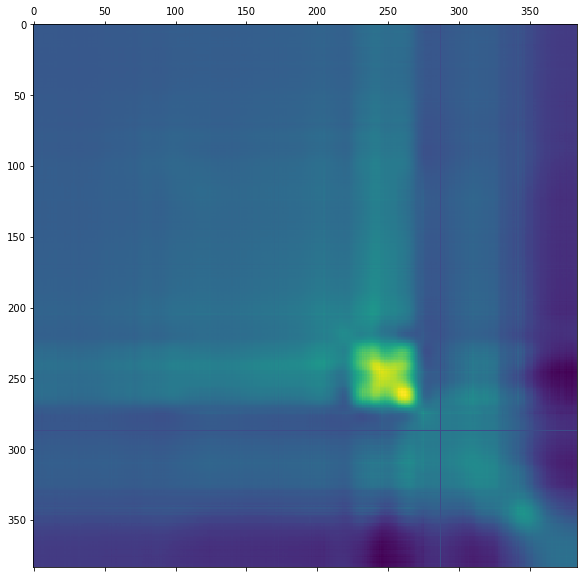

In [436]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(np.cov(sig.values.T))

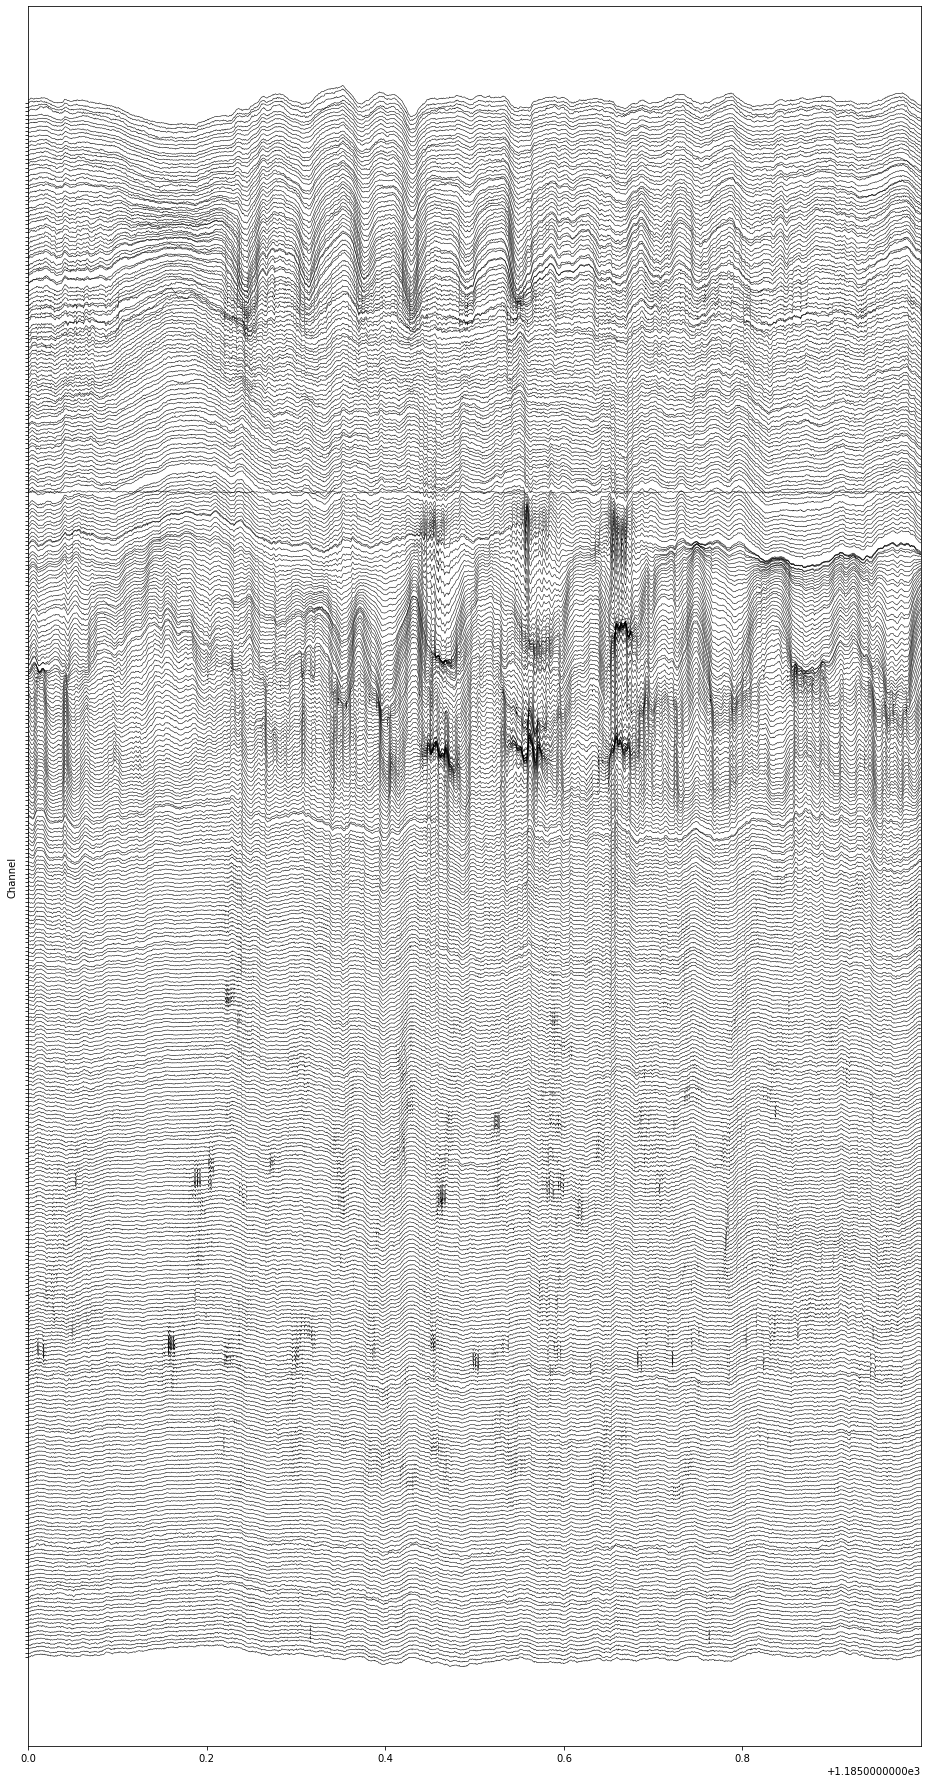

In [441]:
fig, ax = plt.subplots(figsize=(16, 32))

# For TBD figure:
# For LFPs, vpsace=80, figsize=(16, 16)
# for nCX, ~90

# For RO1 figure:
# For NREM LFP 1, figsize=16x32, vspace=100 
# For NREM AP 1, 16x32, vspace = 150
# For REM, vspace = 150
nCh = 384
_lfp_explorer(sig.time.values, sig.values, ax, chan_labels=['']*nCh, window_length=1.0, window_start=0.0, n_plot_chans=nCh, i_chan=0, vspace=150, zero_mean=False, flip_dv=True)